In [1]:
import re
import pandas as pd
import nltk
nltk.download('stopwords')
import string
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer

string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [2]:
path = r'C:\Users\user\Desktop\TU Eindhoven\Q3\Visual Analytics\VisualAnalytics\articles\\'
articles_df = pd.DataFrame(columns=['article_number', 'content'])

In [3]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [4]:
for i in range(844):

    f = open(path + '{}.txt'.format(str(i)), "r")
    art_number = i
    word_list = f.read().splitlines()
    articles_df.loc[i,'article_number'] = art_number
    articles_df.loc[i,'content'] = word_list
    f.close()

print("Reading all articles and converting them into dataframe. Each row is a dataframe...\n")
articles_df

Reading all articles and converting them into dataframe. Each row is a dataframe...



,article_number,content
0,0,"[The Orb, , , BUMP OF PROTESTS IN ABILA IN RES..."
1,1,"[The Light of Truth, , ENORMOUS IPO MAKES THE ..."
2,2,"[Everyday News, , Global boxes of the charity ..."
3,3,"[The Tulip, , PROMINENT MATTER, BURGERMATRIJZE..."
4,4,"[News Online Today, , ELODIS, KRONOS: HELP FR..."
...,...,...
839,839,"[News Desk, , ARREST BLOTTER OF THE POLICE FOR..."
840,840,"[The Orb, , THE DEMONSTRATION ATTRACTS THOUSAN..."
841,841,"[Centrum Sentinel, VOICES - a blog approximate..."
842,842,"[Homeland Illumination, VOICES - a blog about ..."


In [5]:
#list of words without empty strings
for i in range(len(articles_df)):
    without_empty_strings = [string for string in articles_df.loc[i,'content'] if string != ""]
    articles_df.loc[i,'content'] = without_empty_strings
    articles_df.loc[i,'content'] = ' '.join(articles_df.loc[i,'content'])

articles_df.head(10)

,article_number,content
0,0,The Orb BUMP OF PROTESTS IN ABILA IN RESPONSE ...
1,1,The Light of Truth ENORMOUS IPO MAKES THE BILL...
2,2,Everyday News Global boxes of the charity of d...
3,3,"The Tulip PROMINENT MATTER, BURGERMATRIJZEN OF..."
4,4,"News Online Today ELODIS, KRONOS: HELP FROM A..."
5,5,Worldwise The ministry for health studies comp...
6,6,World Journal Four people died in a burning ac...
7,7,News Online Today WRAP UP OF EVENTS AT GASTECH...
8,8,Modern Rubicon ON SCENE BLOG 20 January 2014 1...
9,9,Kronos Star Breaking: Emergency at GAStech Hea...


In [6]:
import datefinder
def extract_dates(text):
#     matches = list(datefinder.find_dates(text))
    matches = re.findall(r'(\d{4}\/\d{2}\/\d{2})|(\d{1,2}\s(Jan|January|Feb|February|Mar|March|Apr|April|May|Jun|June|Jul|July|Aug|August|Sep|September|Oct|October|Nov|November|Dec|December)\s\d{4})',text)
    return matches

articles_df['dates']= articles_df['content'].apply(lambda x: extract_dates(x))
articles_df.head(10)

,article_number,content,dates
0,0,The Orb BUMP OF PROTESTS IN ABILA IN RESPONSE ...,"[(2012/09/08, , )]"
1,1,The Light of Truth ENORMOUS IPO MAKES THE BILL...,"[(2013/12/18, , )]"
2,2,Everyday News Global boxes of the charity of d...,"[(1999/11/16, , )]"
3,3,"The Tulip PROMINENT MATTER, BURGERMATRIJZEN OF...","[(1994/02/18, , )]"
4,4,"News Online Today ELODIS, KRONOS: HELP FROM A...","[(1998/04/26, , )]"
5,5,Worldwise The ministry for health studies comp...,"[(1998/11/10, , )]"
6,6,World Journal Four people died in a burning ac...,"[(2007/03/20, , )]"
7,7,News Online Today WRAP UP OF EVENTS AT GASTECH...,"[(2014/01/20, , )]"
8,8,Modern Rubicon ON SCENE BLOG 20 January 2014 1...,"[(, 20 January 2014, January)]"
9,9,Kronos Star Breaking: Emergency at GAStech Hea...,"[(, 20 January 2014, January)]"


In [7]:
# storing the puntuation free text
articles_df['content']= articles_df['content'].apply(lambda x:remove_punctuation(x))
print("Punctuantion free content...\n")
articles_df.head(10)

Punctuantion free content...



,article_number,content,dates
0,0,The Orb BUMP OF PROTESTS IN ABILA IN RESPONSE ...,"[(2012/09/08, , )]"
1,1,The Light of Truth ENORMOUS IPO MAKES THE BILL...,"[(2013/12/18, , )]"
2,2,Everyday News Global boxes of the charity of d...,"[(1999/11/16, , )]"
3,3,The Tulip PROMINENT MATTER BURGERMATRIJZEN OF ...,"[(1994/02/18, , )]"
4,4,News Online Today ELODIS KRONOS HELP FROM AN ...,"[(1998/04/26, , )]"
5,5,Worldwise The ministry for health studies comp...,"[(1998/11/10, , )]"
6,6,World Journal Four people died in a burning ac...,"[(2007/03/20, , )]"
7,7,News Online Today WRAP UP OF EVENTS AT GASTECH...,"[(2014/01/20, , )]"
8,8,Modern Rubicon ON SCENE BLOG 20 January 2014 1...,"[(, 20 January 2014, January)]"
9,9,Kronos Star Breaking Emergency at GAStech Head...,"[(, 20 January 2014, January)]"


In [8]:
for i in range(len(articles_df)):
    if articles_df['dates'].iloc[i][0][0] != '':
        articles_df['dates'].iloc[i] = articles_df['dates'].iloc[i][0][0]
    else:
        articles_df['dates'].iloc[i] = articles_df['dates'].iloc[i][0][1]
articles_df.head(10)

,article_number,content,dates
0,0,The Orb BUMP OF PROTESTS IN ABILA IN RESPONSE ...,2012/09/08
1,1,The Light of Truth ENORMOUS IPO MAKES THE BILL...,2013/12/18
2,2,Everyday News Global boxes of the charity of d...,1999/11/16
3,3,The Tulip PROMINENT MATTER BURGERMATRIJZEN OF ...,1994/02/18
4,4,News Online Today ELODIS KRONOS HELP FROM AN ...,1998/04/26
5,5,Worldwise The ministry for health studies comp...,1998/11/10
6,6,World Journal Four people died in a burning ac...,2007/03/20
7,7,News Online Today WRAP UP OF EVENTS AT GASTECH...,2014/01/20
8,8,Modern Rubicon ON SCENE BLOG 20 January 2014 1...,20 January 2014
9,9,Kronos Star Breaking Emergency at GAStech Head...,20 January 2014


In [9]:
articles_df['dates']= pd.to_datetime(articles_df['dates'])
articles_df['dates'].value_counts()

2014-01-20    221
2014-01-21     43
2014-01-19     18
2009-06-21     11
2013-12-16      9
             ... 
2012-04-11      1
2012-02-22      1
2012-03-07      1
2010-12-19      1
2011-11-24      1
Name: dates, Length: 222, dtype: int64

In [10]:
#lowercase
articles_df['content']= articles_df['content'].apply(lambda x: x.lower())
print("Lowercase article content...\n")

Lowercase article content...



In [11]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in nltk.corpus.stopwords.words('english')]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

articles_df['content'] = articles_df['content'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# initialize vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(articles_df['content'])

# initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass X to the pca
pca_vecs = pca.fit_transform(X.toarray())
# save the two dimensions in x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# assign clusters and PCA vectors to columns in the original dataframe
articles_df['cluster'] = clusters
articles_df['x0'] = x0
articles_df['x1'] = x1

In [13]:
import numpy as np
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
important,pm,construction,voices,emergency,gastech,blog,january,20,2014

Cluster 1
health,police,international,today,elodis,government,gastech,pok,abila,kronos


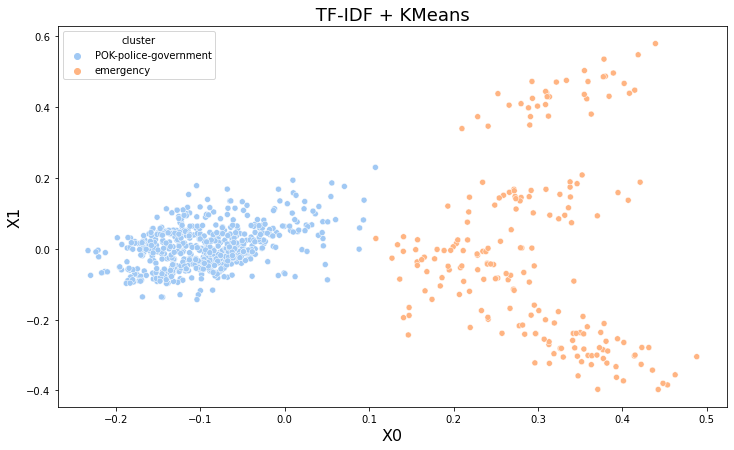

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_map = {0: "emergency", 1: "POK-police-government"} 

# mapping found through get_top_keywords
articles_df['cluster'] = articles_df['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title(" TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})

#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=articles_df, x='x0', y='x1', hue='cluster', palette="pastel")
plt.show()

In [15]:
articles_df

,article_number,content,dates,cluster,x0,x1
0,0,orb bump protests abila response calls action ...,2012-09-08,POK-police-government,-0.127778,-0.048327
1,1,light truth enormous ipo makes billionaire san...,2013-12-18,POK-police-government,-0.038680,0.008214
2,2,everyday news global boxes charity dren disast...,1999-11-16,POK-police-government,-0.059679,-0.023600
3,3,tulip prominent matter burgermatrijzen leader ...,1994-02-18,POK-police-government,-0.062042,-0.025615
4,4,news online today elodis kronos help unexpecte...,1998-04-26,POK-police-government,-0.123843,-0.084724
...,...,...,...,...,...,...
839,839,news desk arrest blotter police force kronos a...,2011-11-24,POK-police-government,-0.048895,-0.008226
840,840,orb demonstration attracts thousands spite rai...,2012-11-12,POK-police-government,-0.084794,-0.067074
841,841,centrum sentinel voices blog approximately imp...,2014-01-20,emergency,0.307349,-0.255265
842,842,homeland illumination voices blog important pe...,2014-01-20,emergency,0.370870,-0.396800


In [16]:
def extract_words(text,regex_expr):
    matches = re.findall(regex_expr,text)
    if matches:
        return True
    else:
        return False
    
articles_df['disappear']= articles_df['content'].apply(lambda x:extract_words(x,r'disappear.{0,4}'))
articles_df['gastech']= articles_df['content'].apply(lambda x:extract_words(x,r'(gastech)'))
articles_df['voice']= articles_df['content'].apply(lambda x:extract_words(x,r'voice.{0,1}'))
articles_df['kidnap']= articles_df['content'].apply(lambda x:extract_words(x,r'kidnap.{0,4}'))
articles_df['pok']= articles_df['content'].apply(lambda x:extract_words(x,r'pok'))
articles_df['employee_names']= articles_df['content'].apply(lambda x:
                                                            extract_words(x,r'(bramar|ribera|pantanal|lagos|mies|forluniau|\
                                                                          lais|onda|borrasca|calzas|orilla|tempestad|azada|\
                                                                          balas|dedos|frente|vasco|pais|sanjorge|barranco|\
                                                                          campo|strum|ovan|arpa|awelon|coginian|hafon|hawelon|\
                                                                          morlun|morluniau|nant|scozzese|bergen|alcazar|baza|\
                                                                          calixto|flecha|herrero|lagos|fusil|osvaldo|vann|resumir\
                                                                          bodrogi|cocinaro|ferro)'))


articles_df

,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names
0,0,orb bump protests abila response calls action ...,2012-09-08,POK-police-government,-0.127778,-0.048327,False,False,False,False,False,True
1,1,light truth enormous ipo makes billionaire san...,2013-12-18,POK-police-government,-0.038680,0.008214,False,True,False,False,False,True
2,2,everyday news global boxes charity dren disast...,1999-11-16,POK-police-government,-0.059679,-0.023600,False,False,False,False,True,False
3,3,tulip prominent matter burgermatrijzen leader ...,1994-02-18,POK-police-government,-0.062042,-0.025615,False,True,False,False,False,True
4,4,news online today elodis kronos help unexpecte...,1998-04-26,POK-police-government,-0.123843,-0.084724,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,news desk arrest blotter police force kronos a...,2011-11-24,POK-police-government,-0.048895,-0.008226,False,False,False,False,False,True
840,840,orb demonstration attracts thousands spite rai...,2012-11-12,POK-police-government,-0.084794,-0.067074,False,False,True,False,True,False
841,841,centrum sentinel voices blog approximately imp...,2014-01-20,emergency,0.307349,-0.255265,False,True,True,False,False,False
842,842,homeland illumination voices blog important pe...,2014-01-20,emergency,0.370870,-0.396800,False,False,True,False,False,False


In [17]:
articles_with_disappearance_word = []
articles_with_gastech_word = []
articles_with_voice_word = []
articles_with_kidnap_word = []
articles_with_pok_word = []
articles_with_employee_word = []



for i in range(844):
    if articles_df['disappear'].iloc[i]:
        articles_with_disappearance_word.append(articles_df['article_number'].iloc[i])
    if articles_df['gastech'].iloc[i]:
        articles_with_gastech_word.append(articles_df['article_number'].iloc[i])
    if articles_df['voice'].iloc[i]:
        articles_with_voice_word.append(articles_df['article_number'].iloc[i])
    if articles_df['kidnap'].iloc[i]:
        articles_with_kidnap_word.append(articles_df['article_number'].iloc[i])
    if articles_df['pok'].iloc[i]:
        articles_with_pok_word.append(articles_df['article_number'].iloc[i])
    if articles_df['employee_names'].iloc[i]:
        articles_with_employee_word.append(articles_df['article_number'].iloc[i])



In [18]:
from nltk.tokenize import word_tokenize
#applying tokenization to the column
articles_df['content']= articles_df['content'].apply(lambda x: word_tokenize(str(x)))

print("Tokenization...")
articles_df.head(10)

Tokenization...


,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names
0,0,"[orb, bump, protests, abila, response, calls, ...",2012-09-08,POK-police-government,-0.127778,-0.048327,False,False,False,False,False,True
1,1,"[light, truth, enormous, ipo, makes, billionai...",2013-12-18,POK-police-government,-0.038680,0.008214,False,True,False,False,False,True
2,2,"[everyday, news, global, boxes, charity, dren,...",1999-11-16,POK-police-government,-0.059679,-0.023600,False,False,False,False,True,False
3,3,"[tulip, prominent, matter, burgermatrijzen, le...",1994-02-18,POK-police-government,-0.062042,-0.025615,False,True,False,False,False,True
4,4,"[news, online, today, elodis, kronos, help, un...",1998-04-26,POK-police-government,-0.123843,-0.084724,False,True,False,False,False,False
5,5,"[worldwise, ministry, health, studies, complai...",1998-11-10,POK-police-government,-0.138251,-0.097153,False,False,False,False,False,False
6,6,"[world, journal, four, people, died, burning, ...",2007-03-20,POK-police-government,-0.083707,-0.015792,False,True,False,False,False,False
7,7,"[news, online, today, wrap, events, gastech, 2...",2014-01-20,POK-police-government,-0.009707,0.045860,False,True,False,True,False,True
8,8,"[modern, rubicon, scene, blog, 20, january, 20...",2014-01-20,emergency,0.194893,-0.059817,False,True,False,False,False,False
9,9,"[kronos, star, breaking, emergency, gastech, h...",2014-01-20,emergency,0.379893,0.486632,False,True,False,False,False,False


In [19]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:20])
articles_df['content']= articles_df['content'].apply(lambda x:remove_stopwords(x))
print("Remove stopwords..")
articles_df.head(10)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']
Remove stopwords..


,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names
0,0,"[orb, bump, protests, abila, response, calls, ...",2012-09-08,POK-police-government,-0.127778,-0.048327,False,False,False,False,False,True
1,1,"[light, truth, enormous, ipo, makes, billionai...",2013-12-18,POK-police-government,-0.038680,0.008214,False,True,False,False,False,True
2,2,"[everyday, news, global, boxes, charity, dren,...",1999-11-16,POK-police-government,-0.059679,-0.023600,False,False,False,False,True,False
3,3,"[tulip, prominent, matter, burgermatrijzen, le...",1994-02-18,POK-police-government,-0.062042,-0.025615,False,True,False,False,False,True
4,4,"[news, online, today, elodis, kronos, help, un...",1998-04-26,POK-police-government,-0.123843,-0.084724,False,True,False,False,False,False
5,5,"[worldwise, ministry, health, studies, complai...",1998-11-10,POK-police-government,-0.138251,-0.097153,False,False,False,False,False,False
6,6,"[world, journal, four, people, died, burning, ...",2007-03-20,POK-police-government,-0.083707,-0.015792,False,True,False,False,False,False
7,7,"[news, online, today, wrap, events, gastech, 2...",2014-01-20,POK-police-government,-0.009707,0.045860,False,True,False,True,False,True
8,8,"[modern, rubicon, scene, blog, 20, january, 20...",2014-01-20,emergency,0.194893,-0.059817,False,True,False,False,False,False
9,9,"[kronos, star, breaking, emergency, gastech, h...",2014-01-20,emergency,0.379893,0.486632,False,True,False,False,False,False


In [20]:
articles_df['content'] = articles_df['content'].apply(lambda x:lemmatizer(x))
articles_df.head(10)

,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names
0,0,"[orb, bump, protest, abila, response, call, ac...",2012-09-08,POK-police-government,-0.127778,-0.048327,False,False,False,False,False,True
1,1,"[light, truth, enormous, ipo, make, billionair...",2013-12-18,POK-police-government,-0.038680,0.008214,False,True,False,False,False,True
2,2,"[everyday, news, global, box, charity, dren, d...",1999-11-16,POK-police-government,-0.059679,-0.023600,False,False,False,False,True,False
3,3,"[tulip, prominent, matter, burgermatrijzen, le...",1994-02-18,POK-police-government,-0.062042,-0.025615,False,True,False,False,False,True
4,4,"[news, online, today, elodis, kronos, help, un...",1998-04-26,POK-police-government,-0.123843,-0.084724,False,True,False,False,False,False
5,5,"[worldwise, ministry, health, study, complaint...",1998-11-10,POK-police-government,-0.138251,-0.097153,False,False,False,False,False,False
6,6,"[world, journal, four, people, died, burning, ...",2007-03-20,POK-police-government,-0.083707,-0.015792,False,True,False,False,False,False
7,7,"[news, online, today, wrap, event, gastech, 20...",2014-01-20,POK-police-government,-0.009707,0.045860,False,True,False,True,False,True
8,8,"[modern, rubicon, scene, blog, 20, january, 20...",2014-01-20,emergency,0.194893,-0.059817,False,True,False,False,False,False
9,9,"[kronos, star, breaking, emergency, gastech, h...",2014-01-20,emergency,0.379893,0.486632,False,True,False,False,False,False


In [21]:
def word_freq(str_list):
    
    new_article = []
    # gives set of unique words
    unique_words = set(str_list)
      
    for words in unique_words :
        new_article.append((words,str_list.count(words)))
#         print(words , ':', str_list.count(words))
    new_article.sort(key=lambda y: y[1],reverse = True)
    return new_article

# for i in range(len(articles_df)):
    
#     str_list = articles_df['content'].iloc[i]
#     # calling the freq function
#     word_freq_list = word_freq(str_list)
#     word_freq_list.sort(key=lambda y: y[1],reverse = True)

articles_df['word_freq'] = articles_df['content'].apply(lambda x:word_freq(x))


In [22]:
#filter articles referring to disappearance, gastech and voice
list_of_common_keywords = list(set(articles_with_disappearance_word).intersection(articles_with_gastech_word,articles_with_voice_word))
print(list_of_common_keywords)
filtered_articles_df = articles_df[articles_df['article_number'].isin(list_of_common_keywords)]
filtered_articles_df


[738, 142]


,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names,word_freq
142,142,"[centrum, sentinel, voice, blog, approximately...",2014-01-21,emergency,0.266915,-0.168307,True,True,True,False,False,False,"[(gastech, 3), (fire, 3), (2014, 2), (approxim..."
738,738,"[homeland, illumination, voice, blog, importan...",2014-01-21,emergency,0.295663,-0.159216,True,True,True,False,False,False,"[(gastech, 3), (headquarters, 2), (2014, 2), (..."


In [23]:
#filter articles referring to disappearance, gastech and voice
common_keywords = list(set(articles_with_pok_word).intersection(articles_with_employee_word))
print(common_keywords)
filtered_articles_df = articles_df[articles_df['article_number'].isin(common_keywords)]
print("POK + Employee Names\n")
filtered_articles_df

[512, 523, 529, 18, 19, 23, 24, 538, 29, 34, 554, 556, 560, 50, 51, 54, 570, 572, 62, 575, 65, 581, 73, 74, 77, 589, 593, 594, 607, 612, 614, 620, 116, 125, 129, 130, 132, 647, 145, 149, 662, 155, 667, 670, 161, 674, 675, 167, 173, 174, 175, 689, 183, 698, 700, 189, 190, 195, 197, 709, 716, 217, 735, 225, 740, 741, 743, 240, 752, 245, 248, 249, 761, 767, 257, 769, 268, 269, 273, 275, 787, 282, 794, 799, 290, 810, 300, 812, 318, 328, 334, 341, 343, 351, 353, 357, 374, 378, 387, 394, 396, 398, 400, 405, 412, 422, 431, 436, 438, 445, 460, 461, 463, 466, 468, 481, 482, 502, 508]
POK + Employee Names



,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names,word_freq
18,18,"[homeland, illumination, pok, remembers, marty...",2012-06-20,POK-police-government,-0.139168,-0.028543,False,False,False,False,True,True,"[(elian, 8), (would, 5), (kronos, 4), (karel, ..."
19,19,"[news, desk, arrested, leader, pok, 20090313, ...",2009-03-13,POK-police-government,-0.122562,0.074074,False,True,False,False,True,True,"[(karel, 3), (customer, 3), (kronos, 3), (kraf..."
23,23,"[general, post, sanjorge, jr, condemns, pok, l...",2009-02-22,POK-police-government,-0.063979,0.060378,False,True,False,False,True,True,"[(gastech, 7), (kronos, 6), (arranged, 5), (pe..."
24,24,"[international, time, profile, elian, karel, 2...",2009-06-22,POK-police-government,-0.160826,0.041787,False,True,True,False,True,True,"[(karel, 8), (government, 5), (pok, 5), (gaste..."
29,29,"[international, news, pok, kidnaps, gastech, e...",2014-01-20,POK-police-government,0.009705,0.193247,False,True,False,True,True,True,"[(abila, 4), (pok, 4), (employee, 4), (gastech..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,"[world, source, gastech, employee, kidnapped, ...",2014-01-21,POK-police-government,0.008914,0.100470,False,True,False,True,True,True,"[(kronos, 5), (gastech, 3), (kidnapped, 3), (e..."
794,794,"[truth, activist, interrupt, movement, near, a...",2001-08-31,POK-police-government,-0.143409,0.001447,False,True,False,False,True,True,"[(people, 5), (kronos, 5), (activist, 3), (gua..."
799,799,"[wrap, living, cut, tragical, short, elian, ka...",2011-06-22,POK-police-government,-0.180013,-0.001409,False,True,False,False,True,True,"[(karel, 12), (death, 6), (died, 6), (force, 5..."
810,810,"[tulip, gastech, approve, new, emblem, 2009051...",2009-05-16,POK-police-government,-0.078838,0.007466,False,True,False,False,True,True,"[(gastech, 7), (emblem, 4), (jr, 4), (new, 4),..."


In [24]:
#most common words between all articles
from collections import Counter

joinedlist = []
for i in range(len(articles_df)):
    joinedlist += list(articles_df['content'].iloc[i])

# Pass the split_it list to instance of Counter class.
Counter = Counter(joinedlist)
  
# most_common() produces k frequently encountered
# input values and their respective counts.

most_occur = Counter.most_common(10)

print("Most common words:\n")
for i in range(len(most_occur)):
   
    print(most_occur[i][0])

Most common words:

kronos
gastech
abila
government
pok
police
elodis
people
gas
year


In [25]:
articles_20012014 = articles_df[articles_df['dates'] == '20-01-2014']
articles_21012014 = articles_df[articles_df['dates'] == '21-01-2014']

In [26]:
articles_df['cluster'].value_counts()

POK-police-government    642
emergency                202
Name: cluster, dtype: int64

In [27]:
keywords_disappearance_voice = list(set(articles_with_disappearance_word).intersection(articles_with_gastech_word))
filtered_articles_df = articles_df[articles_df['article_number'].isin(keywords_disappearance_voice)]
filtered_articles_df

,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names,word_freq
138,138,"[athena, speaks, disappeared, confirmed, contr...",2014-01-20,POK-police-government,-0.022996,0.020422,True,True,False,False,False,True,"[(gastech, 9), (control, 4), (international, 4..."
140,140,"[athena, speaks, wrap, top, event, gastech, 20...",2014-01-20,POK-police-government,0.025480,0.066744,True,True,False,True,False,True,"[(gastech, 10), (kronos, 7), (government, 3), ..."
142,142,"[centrum, sentinel, voice, blog, approximately...",2014-01-21,emergency,0.266915,-0.168307,True,True,True,False,False,False,"[(gastech, 3), (fire, 3), (2014, 2), (approxim..."
167,167,"[international, time, gastech, employee, kidna...",2014-01-21,POK-police-government,0.060284,0.082002,True,True,False,True,True,True,"[(kronos, 5), (gastech, 4), (employee, 4), (ki..."
245,245,"[continent, employee, gastech, kidnapped, kron...",2014-01-21,POK-police-government,0.016558,0.052449,True,True,False,True,True,True,"[(gastech, 5), (kronos, 5), (employee, 4), (ki..."
274,274,"[worldwise, conference, news, catch, police, f...",2014-01-21,POK-police-government,-0.032302,0.082221,True,True,False,True,True,False,"[(gastech, 3), (force, 3), (police, 3), (kidna..."
396,396,"[world, journal, employee, gastech, removed, k...",2014-01-21,POK-police-government,-0.026526,0.058313,True,True,False,True,True,True,"[(gastech, 5), (kronos, 5), (disappeared, 3), ..."
397,397,"[explainer, become, involved, event, gastech, ...",2014-01-20,POK-police-government,0.032042,0.067413,True,True,False,True,False,True,"[(gastech, 10), (kronos, 7), (government, 3), ..."
460,460,"[everyday, news, kidnapped, employee, gastech,...",2014-01-21,POK-police-government,0.014711,0.075583,True,True,False,True,True,True,"[(gastech, 5), (employee, 5), (kronos, 5), (ki..."
679,679,"[explainer, disappeared, confirmed, gastech, d...",2014-01-20,POK-police-government,-0.017519,0.039717,True,True,False,True,False,True,"[(gastech, 9), (international, 4), (million, 4..."


In [28]:
keywords_disappearance_kidnap = list(set(articles_with_disappearance_word).intersection(articles_with_kidnap_word))
filtered_articles_df = articles_df[articles_df['article_number'].isin(keywords_disappearance_kidnap)]
filtered_articles_df

,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names,word_freq
140,140,"[athena, speaks, wrap, top, event, gastech, 20...",2014-01-20,POK-police-government,0.025480,0.066744,True,True,False,True,False,True,"[(gastech, 10), (kronos, 7), (government, 3), ..."
167,167,"[international, time, gastech, employee, kidna...",2014-01-21,POK-police-government,0.060284,0.082002,True,True,False,True,True,True,"[(kronos, 5), (gastech, 4), (employee, 4), (ki..."
245,245,"[continent, employee, gastech, kidnapped, kron...",2014-01-21,POK-police-government,0.016558,0.052449,True,True,False,True,True,True,"[(gastech, 5), (kronos, 5), (employee, 4), (ki..."
274,274,"[worldwise, conference, news, catch, police, f...",2014-01-21,POK-police-government,-0.032302,0.082221,True,True,False,True,True,False,"[(gastech, 3), (force, 3), (police, 3), (kidna..."
396,396,"[world, journal, employee, gastech, removed, k...",2014-01-21,POK-police-government,-0.026526,0.058313,True,True,False,True,True,True,"[(gastech, 5), (kronos, 5), (disappeared, 3), ..."
397,397,"[explainer, become, involved, event, gastech, ...",2014-01-20,POK-police-government,0.032042,0.067413,True,True,False,True,False,True,"[(gastech, 10), (kronos, 7), (government, 3), ..."
460,460,"[everyday, news, kidnapped, employee, gastech,...",2014-01-21,POK-police-government,0.014711,0.075583,True,True,False,True,True,True,"[(gastech, 5), (employee, 5), (kronos, 5), (ki..."
679,679,"[explainer, disappeared, confirmed, gastech, d...",2014-01-20,POK-police-government,-0.017519,0.039717,True,True,False,True,False,True,"[(gastech, 9), (international, 4), (million, 4..."


In [29]:
articles_df.sort_values(by = 'dates',inplace=True)
articles_df

,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names,word_freq
638,638,"[international, time, centrum, central, role, ...",1982-10-02,POK-police-government,-0.071752,-0.079006,False,True,False,False,False,True,"[(gas, 13), (centrum, 9), (tethys, 6), (city, ..."
728,728,"[world, source, centrum, central, role, tethan...",1982-10-02,POK-police-government,-0.062324,-0.074522,False,True,False,False,False,True,"[(gas, 13), (tethys, 6), (centrum, 6), (new, 5..."
796,796,"[continent, central, role, center, industry, g...",1982-10-03,POK-police-government,-0.079963,-0.071480,False,True,False,False,False,True,"[(center, 11), (gas, 6), (tethys, 6), (sanjorg..."
214,214,"[everyday, news, central, paper, center, indus...",1982-10-03,POK-police-government,-0.081210,-0.067222,False,True,False,False,False,True,"[(gas, 13), (center, 11), (tethys, 6), (city, ..."
596,596,"[news, online, today, centrum, central, role, ...",1982-10-03,POK-police-government,-0.071681,-0.054594,False,False,False,False,False,True,"[(gas, 9), (tethys, 4), (one, 3), (centrum, 3)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,55,"[daily, pegasus, inflammation, protest, abila,...",2014-03-26,POK-police-government,-0.118334,-0.059302,False,False,False,False,False,True,"[(kronos, 3), (public, 2), (important, 2), (va..."
234,234,"[everyday, news, 20140326, 21, october, 2013, ...",2014-03-26,POK-police-government,-0.067571,-0.036134,False,False,False,False,False,False,"[(drug, 5), (loblaw, 4), (mdmc, 4), (greater, ..."
535,535,"[continent, insight, expert, thriving, foreign...",2014-03-26,POK-police-government,-0.074423,-0.059456,False,True,False,False,True,False,"[(ceo, 19), (foreign, 18), (kronos, 15), (work..."
656,656,"[everyday, news, penetration, expert, prosperi...",2014-03-26,POK-police-government,-0.090770,-0.039280,False,True,False,False,True,False,"[(foreign, 18), (ceo, 18), (kronos, 15), (work..."


In [32]:
articles_df['article_title'] = ''
lines_list = []
for i in range(844):

    f = open(path + '{}.txt'.format(str(i)), "r")
    
    # Using readlines()
    Lines = f.read().splitlines()
    without_empty_strings = [string for string in Lines if string != ""]
    articles_df['article_title'].iloc[i] = without_empty_strings[1]
    f.close()

articles_df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,article_number,content,dates,cluster,x0,x1,disappear,gastech,voice,kidnap,pok,employee_names,word_freq,article_title
638,638,"[international, time, centrum, central, role, ...",1982-10-02,POK-police-government,-0.071752,-0.079006,False,True,False,False,False,True,"[(gas, 13), (centrum, 9), (tethys, 6), (city, ...",BUMP OF PROTESTS IN ABILA IN RESPONSE TO THE C...
728,728,"[world, source, centrum, central, role, tethan...",1982-10-02,POK-police-government,-0.062324,-0.074522,False,True,False,False,False,True,"[(gas, 13), (tethys, 6), (centrum, 6), (new, 5...",ENORMOUS IPO MAKES THE BILLIONAIRE OF SANJORGE
796,796,"[continent, central, role, center, industry, g...",1982-10-03,POK-police-government,-0.079963,-0.071480,False,True,False,False,False,True,"[(center, 11), (gas, 6), (tethys, 6), (sanjorg...",Global boxes of the charity of dren of the dis...
214,214,"[everyday, news, central, paper, center, indus...",1982-10-03,POK-police-government,-0.081210,-0.067222,False,True,False,False,False,True,"[(gas, 13), (center, 11), (tethys, 6), (city, ...","PROMINENT MATTER, BURGERMATRIJZEN OF THE LEADE..."
596,596,"[news, online, today, centrum, central, role, ...",1982-10-03,POK-police-government,-0.071681,-0.054594,False,False,False,False,False,True,"[(gas, 9), (tethys, 4), (one, 3), (centrum, 3)...","ELODIS, KRONOS: HELP FROM AN UNEXPECTED SOURC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,55,"[daily, pegasus, inflammation, protest, abila,...",2014-03-26,POK-police-government,-0.118334,-0.059302,False,False,False,False,False,True,"[(kronos, 3), (public, 2), (important, 2), (va...",ARREST BLOTTER OF THE POLICE FORCE KRONOS - AB...
234,234,"[everyday, news, 20140326, 21, october, 2013, ...",2014-03-26,POK-police-government,-0.067571,-0.036134,False,False,False,False,False,False,"[(drug, 5), (loblaw, 4), (mdmc, 4), (greater, ...",THE DEMONSTRATION ATTRACTS THOUSANDS IN SPITE ...
535,535,"[continent, insight, expert, thriving, foreign...",2014-03-26,POK-police-government,-0.074423,-0.059456,False,True,False,False,True,False,"[(ceo, 19), (foreign, 18), (kronos, 15), (work...",VOICES - a blog approximately that what is imp...
656,656,"[everyday, news, penetration, expert, prosperi...",2014-03-26,POK-police-government,-0.090770,-0.039280,False,True,False,False,True,False,"[(foreign, 18), (ceo, 18), (kronos, 15), (work...",VOICES - a blog about what is important to the...
